# GPT Annotations EDA

In [190]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [191]:
conn = utils.connectDB()

In [192]:
query = 'SELECT  count(*) as NumValues FROM ebdb.PTC_annotations where answer="yes" group by PTC_id;'
df = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<AxesSubplot:ylabel='Frequency'>

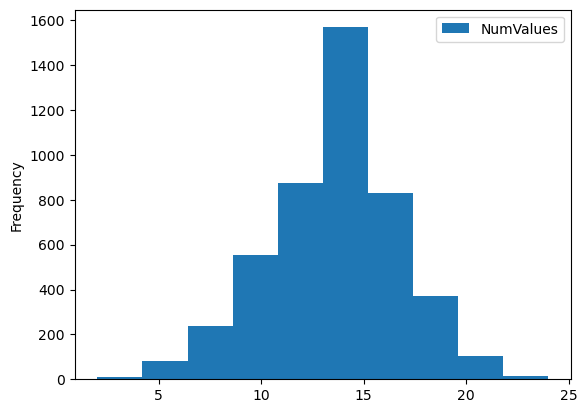

In [193]:
df.plot(kind="hist")

In [194]:
query = 'SELECT  count(*) as count, property FROM ebdb.PTC_annotations \
            where answer="yes" \
            group by property \
            order by count;'

df = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [195]:
# df = df.sort_values('count', ascending=True)

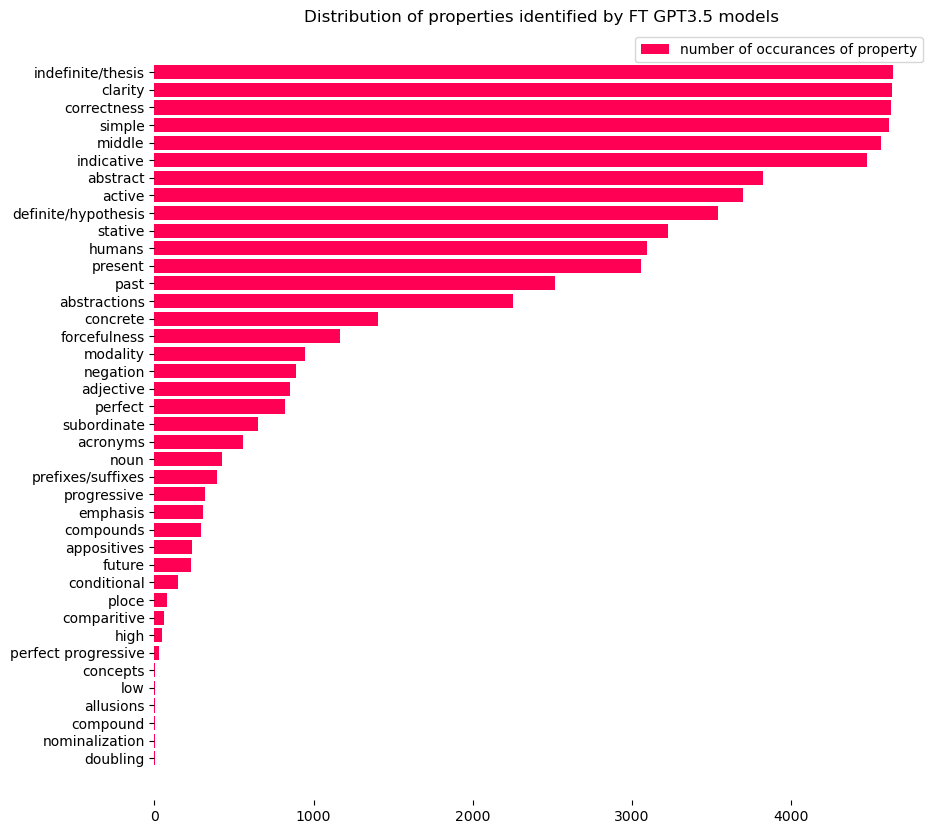

In [196]:
fig, ax = plt.subplots(figsize=[10,10])
ax.barh(df['property'],df['count'], color="#ff0055", label="number of occurances of property")
ax.set_frame_on(False)
ax.set_title('Distribution of properties identified by FT GPT3.5 models')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1.0))
# fig.savefig("gpt_exact_barh.svg",format="svg")
plt.show()

# Calculate the correlations between properties and propaganda techniques

1. binary
2. per technique

In [197]:
import numpy as np
import scipy.stats
from collections import defaultdict
from tqdm import tqdm

In [287]:
conn = utils.connectDB()
query = 'SELECT distinct(property), feature FROM ebdb.PTC_annotations where answer="yes";'

df = pd.read_sql(query, conn)

/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [288]:
# df

In [289]:
# df.to_dict('records')
feature_prop_dict = dict(map(lambda i,j : (i,j) , df['property'],df['feature']))
feature_prop_dict

{'simple': 'Aspect',
 'correctness': 'Language varieties',
 'clarity': 'Language varieties',
 'middle': 'Language varieties',
 'abstract': 'Lexical and semantic fields',
 'concrete': 'Lexical and semantic fields',
 'indefinite/thesis': 'Lexical and semantic fields',
 'definite/hypothesis': 'Lexical and semantic fields',
 'indicative': 'Mood',
 'active': 'Predication',
 'humans': 'Subject choices',
 'abstractions': 'Subject choices',
 'perfect': 'Aspect',
 'emphasis': 'Figures of word choice',
 'forcefulness': 'Language varieties',
 'appositives': 'Phrases built on nouns',
 'stative': 'Predication',
 'present': 'Tense',
 'progressive': 'Aspect',
 'adjective': 'Modifying clauses',
 'past': 'Tense',
 'subordinate': 'Modifying clauses',
 'modality': 'Verb choices',
 'acronyms': 'New words and changing uses',
 'negation': 'Verb choices',
 'noun': 'Modifying clauses',
 'prefixes/suffixes': 'New words and changing uses',
 'compounds': 'New words and changing uses',
 'comparitive': 'Modifying 

In [291]:
properties = list(df['property'])

In [292]:
len(properties)

40

In [293]:
techniques = ['Appeal_to_Authority',
             'Appeal_to_fear-prejudice',
             'Bandwagon',
             'Black-and-White_Fallacy',
             'Causal_Oversimplification',
             'Doubt',
             'Exaggeration,Minimisation',
             'Flag-Waving',
             'Loaded_Language',
             'Name_Calling,Labeling',
             'Obfuscation,Intentional_Vagueness,Confusion',
             'Red_Herring',
             'Reductio_ad_hitlerum',
             'Repetition',
             'Slogans',
             'Straw_Men',
             'Thought-terminating_Cliches',
             'Whataboutism',
             'Not_Propaganda']

In [284]:
def makeTArr(s):
    tArr = [0]*19
    
    if type(s) == list:
        if len(s) == 0:
            s = [18]
        for i in s:
            tArr[i] = 1
    else:
        try:
            _list = ast.literal_eval(s)
            if len(_list) == 0:
                _list = [18]
            for i in _list:
                tArr[i] = 1
        except:
            pass
    
    return np.array(tArr)

In [285]:
conn = utils.connectDB()
# properties = ['forcefulness']
correlations = defaultdict(list)
for prop in tqdm(properties):

    query = f'SELECT pa.answer, p.labels, p.technique_classification FROM ebdb.PTC_annotations as pa \
            JOIN ebdb.PTC as p on pa.PTC_id = p.id \
            WHERE pa.property = "{prop}";'
    

    df = pd.read_sql(query, conn)

    df['answer'] = df['answer'].apply(lambda x: 0 if x=='no' else 1)
    
    df['techniques'] = df['technique_classification'].apply(makeTArr)
    
    # y = df['labels']
    # x = df['answer']
    # correlations[prop] = [p_r, p]
    
    for i in range(0,19):
    
        x = df['answer']
        y = df['techniques'].apply(lambda x: x[i])
        

        p_r, p = scipy.stats.pearsonr(x, y)

        correlations[prop].append([p_r,p])

  0%|                                                    | 0/40 [00:00<?, ?it/s]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
  2%|█                                           | 1/40 [00:04<03:07,  4.81s/it]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
  5%|██▏                                         | 2/40 [00:07<02:11,  3.47s/it]/Users/kylehamilton/opt/anaconda3/envs/annotation/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQL

## Correlation matrix

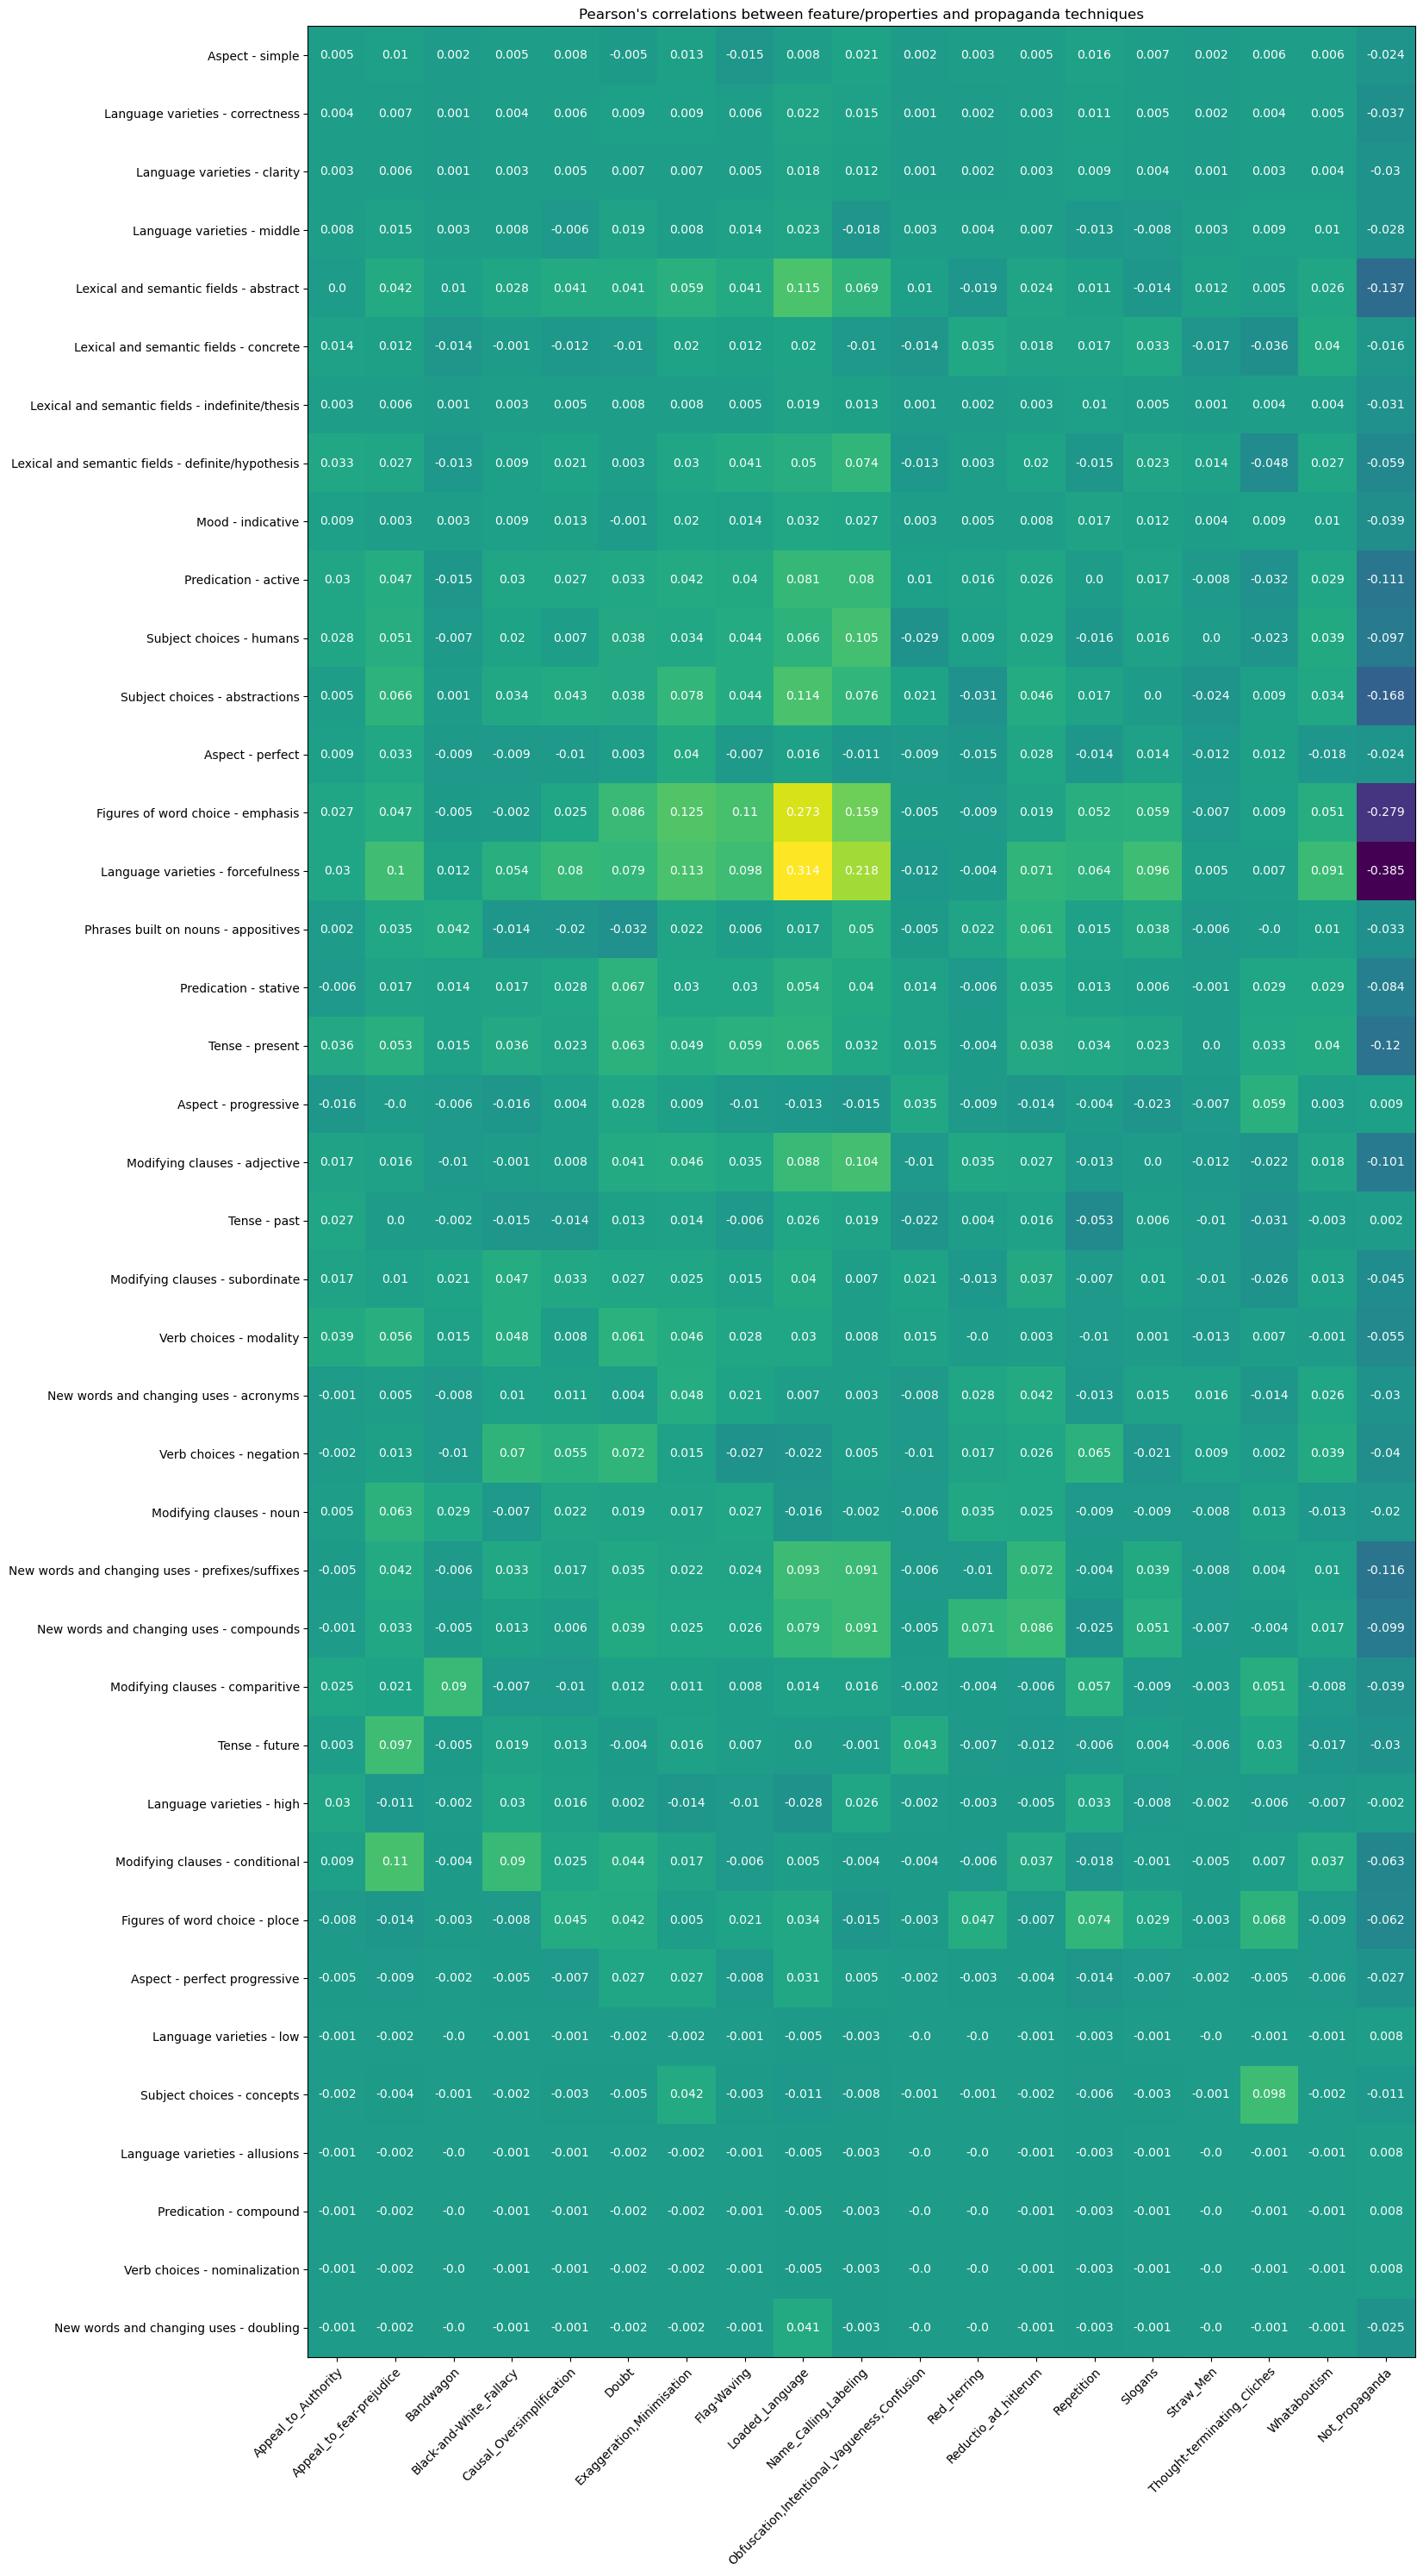

In [286]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl



_corrs = []
_props = []

for k,v in correlations.items():
    f = feature_prop_dict[k]
    _props.append(f+" - "+k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,30])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson's correlations between feature/properties and propaganda techniques")
fig.tight_layout()
fig.savefig("ptc_correlations.svg",format="svg")
plt.show()

# Compare to the 30 gold standard sentences

# NOTE: 
## There arent' enough examples to calculate correlations with p values below 0.05. Not going to finish this exercise

1. predicted
2. gold labels

In [207]:
data_path = "data/V3/_FT_Maj_gpt3.5/"

In [208]:
f_name = "_V3_Aspect.csv"

In [252]:
df = pd.read_csv(data_path+f_name)[['technique','ground truth']]

In [253]:
df['technique'] = df['technique'].apply(lambda x: "[18]" if x=="[]" else x)
df['technique'] = df['technique'].apply(lambda x:[int(i) for i in re.findall(r'\d+',x)])

In [254]:
df['techniques']= df['technique'].apply(lambda s: makeTArr(s))

In [255]:
df['ground truth'] = df['ground truth'].apply(lambda x: ast.literal_eval(x))

In [256]:
df.head()

,technique,ground truth,techniques
0,"[3, 16]",[simple],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[4],[simple],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[9, 5]","[simple, progressive]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,[6],[perfect],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[13, 6]","[simple, perfect]","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ..."


In [257]:
df = df.explode('ground truth')

In [258]:
df['ground truth'] = df['ground truth'].apply(lambda x: 'no_aspect' if type(x) == float else x)

In [263]:
props = list(df['ground truth'].unique())
props

['simple', 'progressive', 'perfect', 'no_aspect']

In [268]:
def makePArr(s):
    _list = [0,0,0,0]
    _list[props.index(s)]=1
    return _list
df['truths'] = df['ground truth'].apply(makePArr)

In [270]:
df.head()

,technique,ground truth,techniques,truths
0,"[3, 16]",simple,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0]"
1,[4],simple,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0]"
2,"[9, 5]",simple,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0]"
2,"[9, 5]",progressive,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0]"
3,[6],perfect,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0]"


In [274]:
correlations = defaultdict(list)
for i in range(0,19):
    for j in range(0,4):
        prop = props[j]
        
        x = df['truths'].apply(lambda x: x[j])
        y = df['techniques'].apply(lambda x: x[i])
        
        
        p_r, p = scipy.stats.pearsonr(x, y)

        correlations[prop].append([p_r,p])

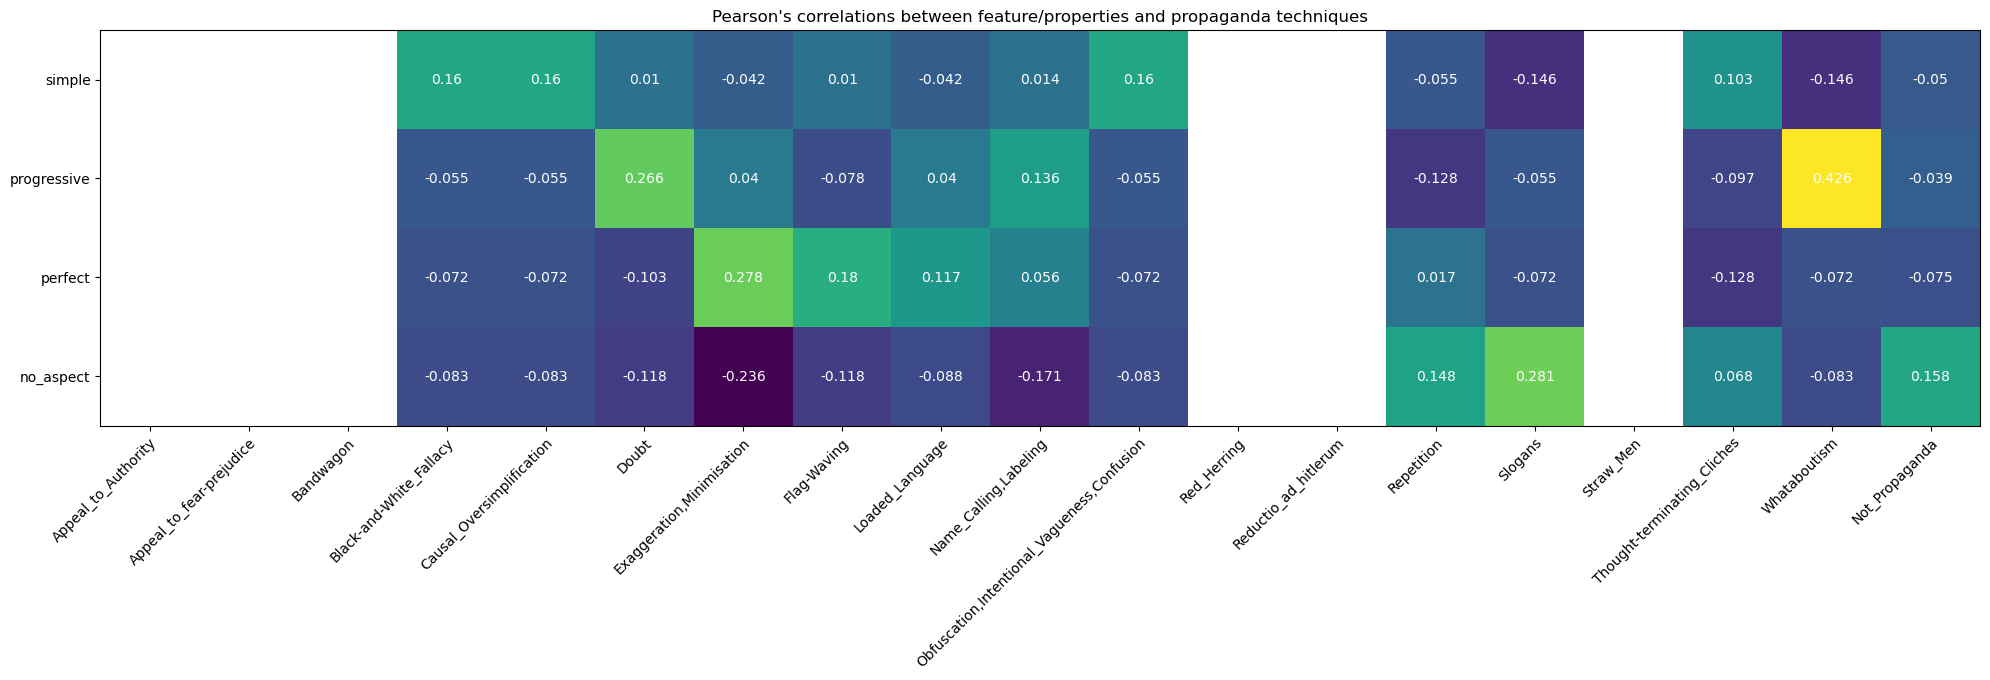

In [277]:
_corrs = []
_props = []

for k,v in correlations.items():
    # f = feature_prop_dict[k]
    # _props.append(f+" - "+k)
    _props.append(k)
    v = [i.round(3) for i in list(np.array(v)[:,0])]
    _corrs.append(v)

_corrs = np.array(_corrs)

fig, ax = plt.subplots(figsize=[20,30])
im = ax.imshow(_corrs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(techniques)), labels=techniques)
ax.set_yticks(np.arange(len(_props)), labels=_props)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(_props)):
    for j in range(len(techniques)):
        text = ax.text(j, i, _corrs[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Pearson's correlations between feature/properties and propaganda techniques")
fig.tight_layout()
plt.show()

In [278]:
correlations

defaultdict(list,
            {'simple': [[nan, nan],
              [nan, nan],
              [nan, nan],
              [0.1595952799353105, 0.3007575421470596],
              [0.15959527993531053, 0.3007575421470596],
              [0.009929257812241677, 0.9489951739608808],
              [-0.04240995499969709, 0.78459175179469],
              [0.00992925781224166, 0.9489951739608808],
              [-0.042409954999697075, 0.7845917517946897],
              [0.014388861576723866, 0.9261403657695632],
              [0.15959527993531053, 0.3007575421470596],
              [nan, nan],
              [nan, nan],
              [-0.05539340353675405, 0.720990936786824],
              [-0.1457174295061531, 0.34526955583818975],
              [nan, nan],
              [0.1025684724382649, 0.5076338509682635],
              [-0.14571742950615307, 0.34526955583818975],
              [-0.049844478627922705, 0.7479736914414251]],
             'progressive': [[nan, nan],
              [nan, nan],
 

In [220]:
import re
s = "[ 3 16]"
[int(i) for i in re.findall(r'\d+',s)]

[3, 16]

In [266]:
props.index('simple')

0